## Itérer sur un ABR

Itérer sur un ABR, c'est être capable d'écrire une boucle qui parcourt tous les éléments de l'arbre dans l'ordre

En python, pour un arbre de racine R, on voudrait avoir 

&nbsp;&nbsp;&nbsp;`for noeud in R: 
      print(noeud.clef)`

En C++, pour parcourir un `std::set S`, on peut écrire 

&nbsp;&nbsp;&nbsp;`for(auto it = S.begin(); it != S.end(); ++it) 
      cout << *it;`

## En python

Commençons par noter que dans certains langages - dont python - savoir parcourir suffit à savoir itérer.

Pour rendre itérable par ordre croissant les noeuds de l'arbre, il suffit d'écrire un parcours symétrique en utilisant le mot clé `yield`. 

In [34]:
class Noeud:
    def __init__(self,val):
        self.clef = val; self.gauche = None; self.droite = None
        
    def __iter__(self):
        if self.gauche:
            yield from self.gauche
        yield self
        if self.droite:
            yield from self.droite

In [31]:
R = Noeud(4)
R.gauche = G = Noeud(2)
G.gauche = Noeud(1); G.droite = Noeud(3)
R.droite = D = Noeud(5)
D.droite = DD = Noeud(7)
DD.gauche = Noeud(6)
import include.helpers as h

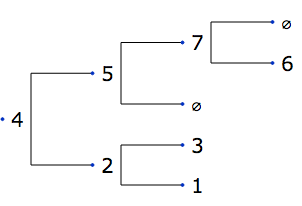

In [32]:
h.afficher_ABR(R)

La méthode `__iter__` de la classe `Noeud` nous permet d'écrire 

In [35]:
for noeud in R:
    print(noeud.clef, end = " ")

1 2 3 4 5 6 7 

Cette approche se base sur les [coroutines](https://en.wikipedia.org/wiki/Coroutine), i.e. des fonctions dont l'exécution peut être suspendue et reprise. 

Ce n'est pas actuellement disponible en C++ standard, mais 

* proposé, mais pas encore approuvé, pour C++20 


* disponible dans MSVC 2017 et clang 5.0, dans le namespace `std::experimental`

## Element suivant 

En l'absence de coroutine, il nous faut pouvoir écrire une fonction 

In [53]:
def noeud_suivant(n):
    return # le noeud suivant dans l'ordre croissant

qui soit capable de se déplacer dans l'arbre indépendemment de lui, éventuellement sans en connaître la racine. 

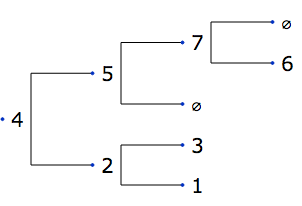

In [54]:
h.afficher_ABR(R)

* Les noeuds suivants de 2, 4, et 5 sont le minimum de leur sous-arbre droit. il suffira d'appeler notre fonction `noeud_min` pour y accéder


* Les noeuds suivants de 1 ,3, et 6 sont parmi leurs ancêtres. Plus exactement, ils sont le premier ancêtre pour lequel on remonte depuis l'enfant gauche. 


* Le noeud suivant de 7 est `None`

La méthode la plus simple pour accéder aux ancêtres est d'ajouter un pointeur vers le noeud parent à chaque noeud. C'est la technique utilisée par la STL en C++. 

In [36]:
class Noeud:
    def __init__(self,val,parent):
        self.clef = val
        self.parent = parent
        self.gauche = None 
        self.droite = None

In [46]:
R         = N4 = Noeud(4,None)
N4.gauche = N2 = Noeud(2,N4)
N4.droite = N5 = Noeud(5,N4)
N2.gauche = N1 = Noeud(1,N2)
N2.droite = N3 = Noeud(3,N2)
N5.droite = N7 = Noeud(7,N5)
N7.gauche = N6 = Noeud(6,N7)

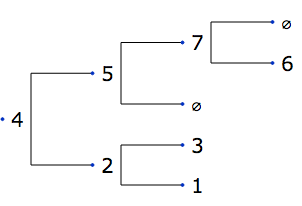

In [56]:
h.afficher_ABR(R)

In [57]:
def clef(R): return R.clef if R else "None"

for n in [ N1, N2, N3, N4, N5, N6, N7 ]:
    print("Noeud {}: P = {}, G = {}, D = {}".format(clef(n),
           clef(n.parent), clef(n.gauche), clef(n.droite)))

Noeud 1: P = 2, G = None, D = None
Noeud 2: P = 4, G = 1, D = 3
Noeud 3: P = 2, G = None, D = None
Noeud 4: P = None, G = 2, D = 5
Noeud 5: P = 4, G = None, D = 7
Noeud 6: P = 7, G = None, D = None
Noeud 7: P = 5, G = 6, D = None


Le noeud suivant est donc 
* le minimum du sous-arbre droit s'il existe
* sinon, le premier ancêtre dont on remonte depuis la gauche
* sinon, `None` s'il n'y a plus de parent en remontant. 

In [58]:
def noeud_min(R):     
    return noeud_min(R.gauche) if R.gauche else R

def noeud_suivant(n):
    if n.droite:
        return noeud_min(n.droite)
    else:
        while n.parent and n.parent.gauche != n:
            n = n.parent
        return n.parent

Ces fonctions nous permettent d'itérer sur l'arbre par ordre croissant à partir du premier noeud (`noeud_min(R)`)

In [59]:
n = noeud_min(R)
while n:
    print(n.clef, end=" ")
    n = noeud_suivant(n)

1 2 3 4 5 6 7 

## Sans lien vers le parent

Il est aussi possible de trouver le noeud suivant sans avoir d'attribut `parent` à chaque noeud. Mais cela requiert

* de connaitre la racine de l'arbre


* quand le noeud courrant n'a pas d'enfant droit
    * de chercher le noeud courrant
    * en se souvenant du dernier noeud pour lequel on a tourné à gauche en cherchant

In [76]:
def noeud_suivant(R,n):
    if n.droite:
        return noeud_min(n.droite)
    else:
        suivant = None
        r = R
        while r.clef != n.clef:
            if n.clef < r.clef:
                suivant = r
                r = r.gauche
            else:
                r = r.droite
        return suivant

Cet algorithme fonctionne aussi, mais avec une complexité temporelle plus élevée (logarithmique au lieu de constant en temps amorti)

In [77]:
n = noeud_min(R)
while n:
    print(n.clef, end=" ")
    n = noeud_suivant(R,n)

1 2 3 4 5 6 7 

<table style="width: 100%; border: 0px">
<tr style="background-color:white; border:0px">
<td style="width: 120px; border: 0px">
    <img src="https://heig-vd.ch/ResourcePackages/WhiteFox/assets/images/logo-heig-vd.svg" height=200px align=left >
    </td>
    <td style="vertical-align: middle; border: 0px" height=200px>
    <p style="text-align: left">
        <a href="https://ocuisenaire.github.io/ASD1-notebooks/">ASD1 Notebooks on GitHub.io</a>
 </p>        
<p style="text-align: left">
© Olivier Cuisenaire, 2018 </p>
</td>
</tr>
</table>